In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
print(df.isnull().sum())


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [6]:
print(df.describe().T)

              count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup    20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude    20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude   20640.0  -119.569704     2.003532 -124.350000 -121.800000   
PRICE       20640.0     2.068558     1.153956    0.149990    1.196000   

                    50%          75%           max  
MedInc         3.534800     4.743250     15.000100  
HouseAge      29.000000    37.000000     52.000000  
AveRooms       5.229129     6.052381    141.909091  
AveBedrms      1.048780     1.099526     34.066667  
Popu

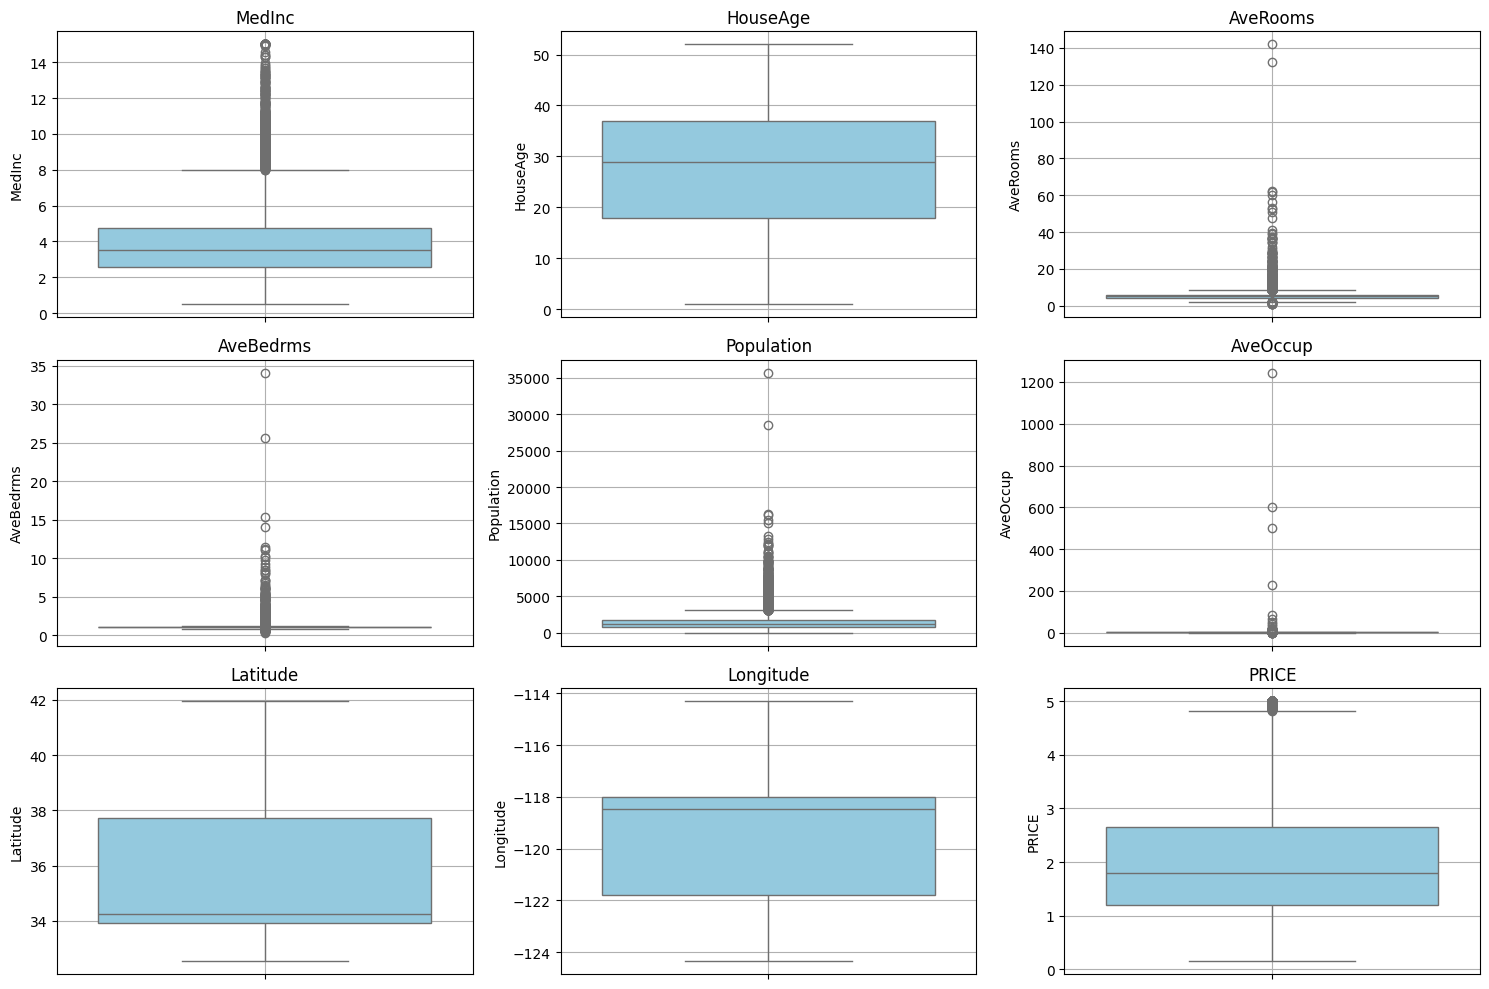

In [7]:
cols = df.columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
df = df[df['PRICE'] < 5.0]
df = df[df['AveRooms'] < 10]
df = df[df['AveOccup'] < 10]

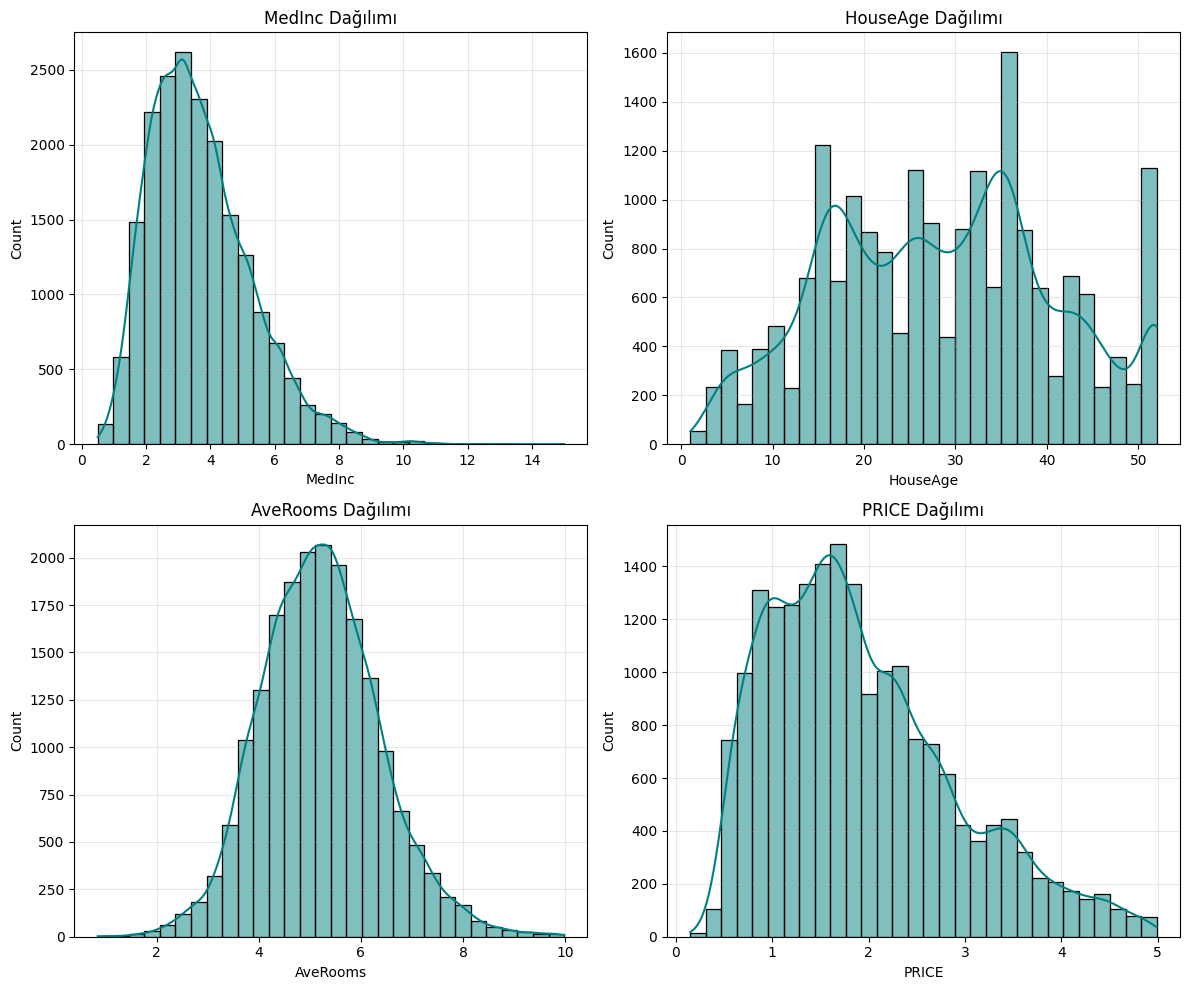

In [9]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'PRICE']

plt.figure(figsize=(12, 10))

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'{col} Dağılımı')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

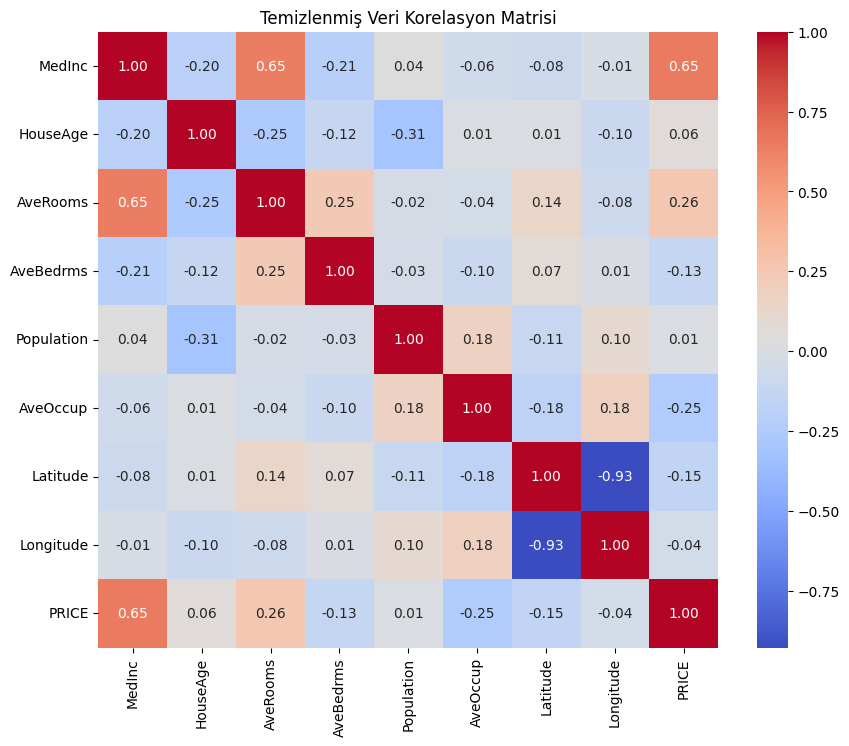

In [10]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Temizlenmiş Veri Korelasyon Matrisi')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('PRICE', axis=1)

y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)


print(f"MAE (Ortalama Sapma): {mae:.4f}")
print(f"RMSE (Cezalı Sapma):  {rmse:.4f}")


MAE (Ortalama Sapma): 0.4456
RMSE (Cezalı Sapma):  0.6006


$$\text{Hata Yüzdesi} = \frac{\text{Hata Miktarı (MAE)}}{\text{Ortalama Fiyat}}$$


Bu datasette %21.6 sapma var

Random Forest'a geçmeden önce onun yapı taşı olan Karar Ağacını bilmeliyiz.

Lineer Regresyon ne yapıyordu? Verilerin arasından dümdüz bir çizgi çekmeye çalışıyordu. Ama hayat her zaman düz bir çizgi değildir. Bazen kararlarımız "Eğer/Değilse" (If/Else) kurallarına dayanır.


İşte Karar Ağacı, veriyi sürekli parçalara bölerek (dallandırarak) sonuca ulaşmaya çalışır.

Avantajı: Düz çizgilerle sınırlı değildir. Çok karmaşık ilişkileri (zikzakları) yakalayabilir.

Dezavantajı: Tek bir ağaç bazen veriyi "ezberler" (Overfitting). Yani sadece o günkü veriyi çok iyi öğrenir ama yeni veri gelince çuvallar.




Orman Kanunu: Random Forest Nedir?


Bir tane ağacın ezberleme sorunu varsa, çözüm nedir? Bir sürü ağaç dikmek!

Random Forest (Rastgele Orman), yüzlerce Karar Ağacından oluşan bir "kuruldur". Çalışma mantığına "Kalabalıkların Bilgeliği" (Wisdom of Crowds) denir.

In [13]:
## RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"MAE (Ortalama Sapma): {mae_rf:.4f}")
print(f"RMSE (Cezalı Sapma):  {rmse_rf:.4f}")

print(f"Ortalama Hata (MAE): {mae_rf * 100000:.0f} $")
print(f"Büyük Hatalar Dahil (RMSE): {rmse_rf * 100000:.0f} $")

MAE (Ortalama Sapma): 0.3015
RMSE (Cezalı Sapma):  0.4511
Ortalama Hata (MAE): 30146 $
Büyük Hatalar Dahil (RMSE): 45112 $


🧠 Veri Bilimci Yorumu
Bu tablo bize çok net bir hikaye anlatıyor:

Dramatik İyileşme: Ortalama hatayı 44.500 dolardan 30.150 dolara düşürdün. Bu, her bir ev satışında müşteriye 14.400 dolar daha doğru fiyat vermek demektir. Emlak piyasasında bu güvenilirlik farkı devasadır.

Neden Bu Kadar Fark Etti?

Lineer Regresyon: "Ev büyüdükçe fiyat artar" gibi sadece düz ilişkileri görebiliyordu.

Random Forest: "Ev eski ama okyanusa yakınsa fiyat artar, ama ev eski ve iç kesimdeyse fiyat düşer" gibi karmaşık, zikzaklı ve koşullu ilişkileri çözdü.

Büyük Hatalar Azaldı: RMSE skorundaki ciddi düşüş, modelin artık uçuk fiyatlı evlerde eskisi kadar saçmalamadığını, daha kontrollü tahminler yaptığını gösteriyor.

/tmp/ipython-input-2004820401.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


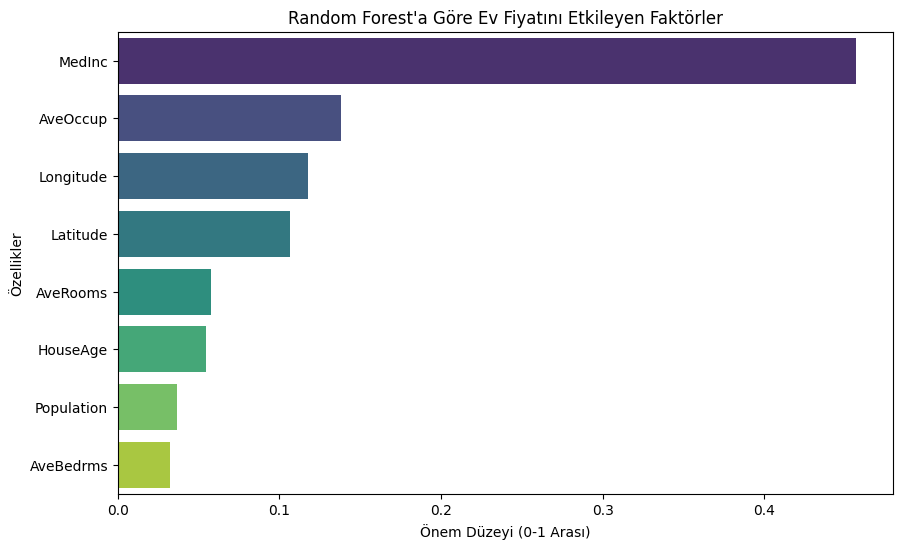

      Feature  Importance
0      MedInc    0.456829
5    AveOccup    0.138377
7   Longitude    0.117449
6    Latitude    0.106653
2    AveRooms    0.057428
1    HouseAge    0.054282
4  Population    0.036442
3   AveBedrms    0.032538


In [15]:

importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Random Forest'a Göre Ev Fiyatını Etkileyen Faktörler")
plt.xlabel('Önem Düzeyi (0-1 Arası)')
plt.ylabel('Özellikler')
plt.show()

print(feature_importance_df)